<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/4_demand_kharid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('data_demand_kharid.xlsx')

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,KHARID
0,0,28,16201007,BP,GS,SBS,140207,GS-16201007-140207-BP,63016,50600
1,1,28,16201007,BP,GS,SBS,140206,GS-16201007-140206-BP,58964,41000
2,2,28,16201007,BP,GS,SBS,140205,GS-16201007-140205-BP,57489,47200
3,3,28,16201007,BP,GS,SBS,140204,GS-16201007-140204-BP,58544,68000
4,4,28,16201007,BP,GS,SBS,140203,GS-16201007-140203-BP,74039,46750
...,...,...,...,...,...,...,...,...,...,...
213,213,103,16201034,BP,GS,SBS,140003,GS-16201034-140003-BP,6028,10416
214,214,103,16201034,BP,GS,SBS,140209,GS-16201034-140209-BP,7128,590
215,215,103,16201034,BP,GS,SBS,140105,GS-16201034-140105-BP,10579,10000
216,216,103,16201034,BP,GS,SBS,140010,GS-16201034-140010-BP,17019,4270


In [ ]:
data['Date_x'].value_counts()

Date_x
35     27
68     23
103    23
28     22
50     22
56     20
49     18
102    18
41     16
85     15
57     14
Name: count, dtype: int64

In [ ]:
dfs = {}

for i in range(0, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[35] = dfs[35].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[35]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,KHARID
38,3026,6912
39,3626,7560
40,4152,5388
41,5228,5832
48,4839,2591
43,7610,2376
44,5584,10584
45,5592,7776
46,5029,1
47,6884,9258


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df_lstm = df.copy()

In [ ]:
features = df_lstm.drop(columns=['Demand']).values
target = df_lstm['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=1, kernel_regularizer=l2(0.001)))
model_lstm.add(Activation('linear'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

predictions = model_lstm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 56284684.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 56283704.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 56283252.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 56283100.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 56282092.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 56283320.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 56282648.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 56282180.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 56281844.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 56281452.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 56280600.0000
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 56280428.0000
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 56279504.0000
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 56278808.0000
Epo

In [ ]:
next_12_data = df_lstm.iloc[-12:].drop(columns=['Demand']).values
next_12_data = np.reshape(next_12_data, (next_12_data.shape[0], 1, next_12_data.shape[1]))
next_12_predictions = model_lstm.predict(next_12_data).flatten()
print("Next 12 Predictions:", next_12_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
Next 12 Predictions: [0.2601375  0.25838208 0.23375984 0.25975502 0.25347432 0.2598305
 0.2579514  0.26015645 0.26015645 0.2588774  0.26005012 0.26015544]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lstm.columns)
df_to_append['Demand'] = next_12_predictions.flatten()
for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0
df_lstm = pd.concat([df_lstm, df_to_append], ignore_index=True)

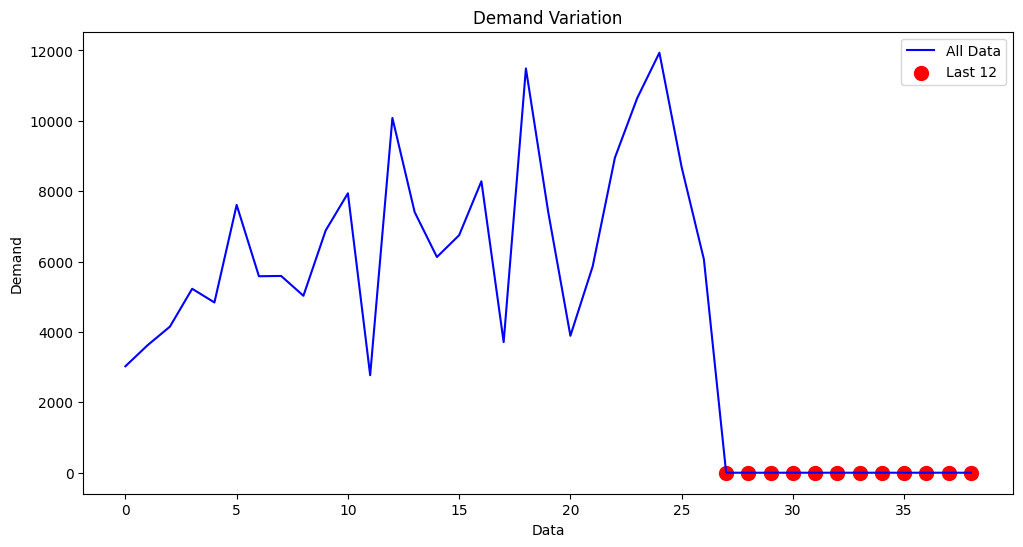

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Demand'], label='All Data', color='blue')
plt.scatter(df_lstm.index[-12:], df_lstm['Demand'].tail(12), color='red', label='Last 12', s=100)
plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()
plt.show()

In [ ]:
df_lstm['Percentage Change'] = df_lstm['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lstm['Percentage Change'] >= -tolerance) & (df_lstm['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

df_lr = df.copy()

features = df_lr.drop(columns=['Demand'])
target = df_lr['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 5019453.832801527


In [ ]:
next_12_data = df_lr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [7133.12547243 6498.50935358 6181.20129415 6700.43266412 6325.43223025
 6729.27885134 6469.66316636 8716.46063766 8187.61387195 6542.31282306
 6886.3303151  7559.40801692]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

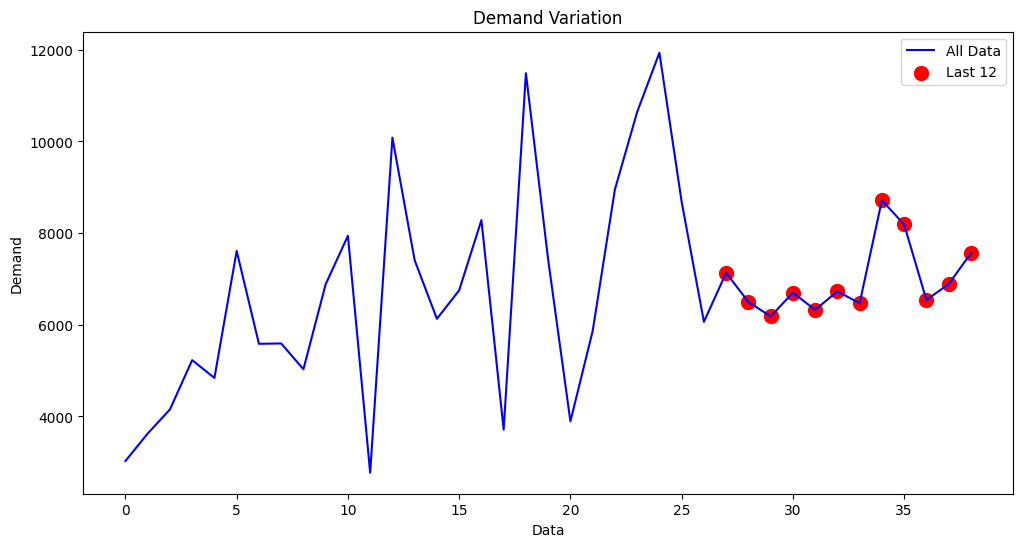

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr

,Demand,KHARID
0,3026.000000,6912
1,3626.000000,7560
2,4152.000000,5388
3,5228.000000,5832
4,4839.000000,2591
5,7610.000000,2376
6,5584.000000,10584
7,5592.000000,7776
8,5029.000000,1
9,6884.000000,9258


In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### SVR

In [ ]:
from sklearn.svm import SVR

df_svr = df.copy()

features = df_svr.drop(columns=['Demand'])
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_svr = SVR(kernel='linear')

model_svr.fit(X_train, y_train)

predictions = model_svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 3037837.298257342


In [ ]:
next_12_data = df_svr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [6601.02647556 5658.77352445 5187.6470489  5958.58128162 5401.79544689
 6001.41096122 5615.94384485 8951.90000005 8166.68920736 5723.81118606
 6234.59477234 7233.95396287]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,KHARID
0,3026.000000,6912
1,3626.000000,7560
2,4152.000000,5388
3,5228.000000,5832
4,4839.000000,2591
5,7610.000000,2376
6,5584.000000,10584
7,5592.000000,7776
8,5029.000000,1
9,6884.000000,9258


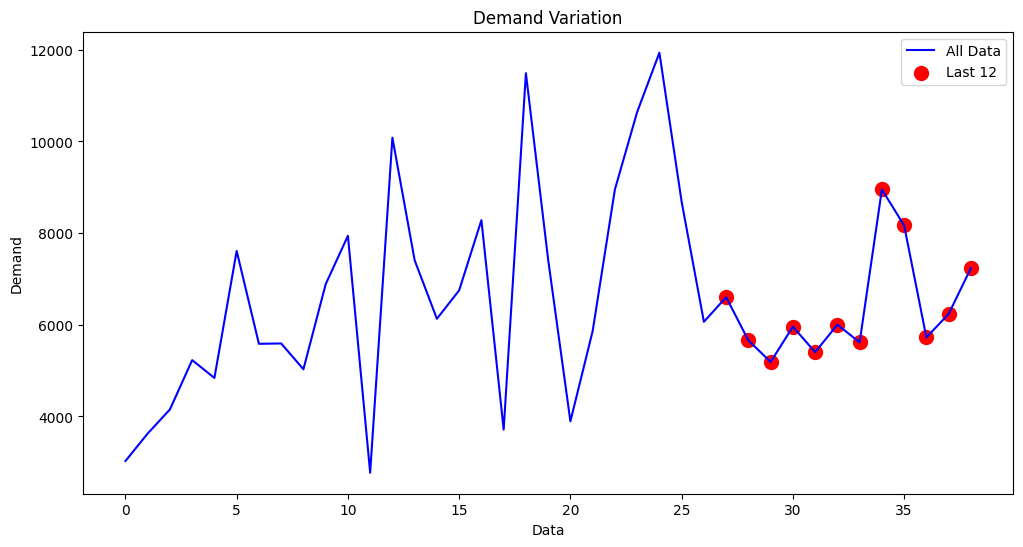

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_dt = df.copy()

features = df_svr[['KHARID']]
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 5843374.724142652


In [ ]:
next_12_data = df_dt.iloc[-12:][['KHARID']]
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 5188.5  8283.   3712.  11489.   7420.   3892.   5861.   8952.  10642.
 11936.   8683.  10082. ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,KHARID
0,3026.0,6912
1,3626.0,7560
2,4152.0,5388
3,5228.0,5832
4,4839.0,2591
5,7610.0,2376
6,5584.0,10584
7,5592.0,7776
8,5029.0,1
9,6884.0,9258


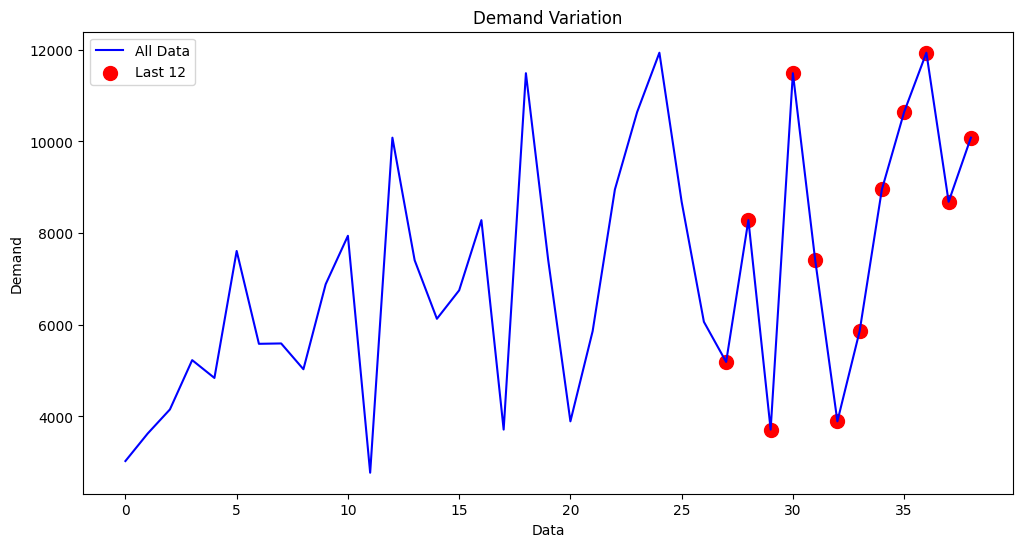

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_rf = df.copy()

features = df_rf.drop(columns=['Demand'])
target = df_rf['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 2066050.8424074082


In [ ]:
next_12_data = df_rf.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 5120.39666667  7908.93        4975.63        9053.37
  7107.88        5862.63        6047.03        9325.55
  9751.03       10284.38        7325.85        6160.94      ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

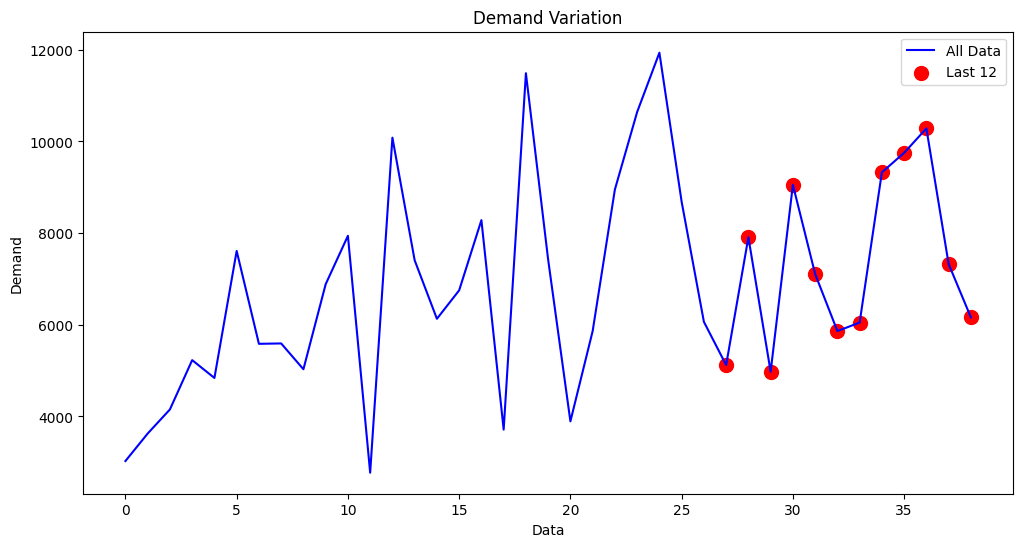

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
